In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
data=pd.read_csv('/content/Walmart.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [7]:
# Aggregate weekly sales
weekly_sales = (
    data
    .groupby(pd.Grouper(key='Date', freq='W'))['Weekly_Sales']
    .sum()
    .reset_index()
)

weekly_sales.head()

,Date,Weekly_Sales
0,2010-02-07,49750740.50
1,2010-02-14,48336677.63
2,2010-02-21,48276993.78
3,2010-02-28,43968571.13
4,2010-03-07,46871470.30


In [8]:
# Aggregate monthly sales
monthly_sales = (
    data
    .groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales']
    .sum()
    .reset_index()
)

monthly_sales.head()

,Date,Weekly_Sales
0,2010-02-28,1.903330e+08
1,2010-03-31,1.819198e+08
2,2010-04-30,2.314124e+08
3,2010-05-31,1.867109e+08
4,2010-06-30,1.922462e+08


In [10]:
# Set Date as index
data_ts = data.set_index('Date')

# Monthly aggregation
monthly_sales = data_ts['Weekly_Sales'].resample('M').sum()
monthly_sales.head()


,Weekly_Sales
Date,
2010-02-28,1.903330e+08
2010-03-31,1.819198e+08
2010-04-30,2.314124e+08
2010-05-31,1.867109e+08
2010-06-30,1.922462e+08


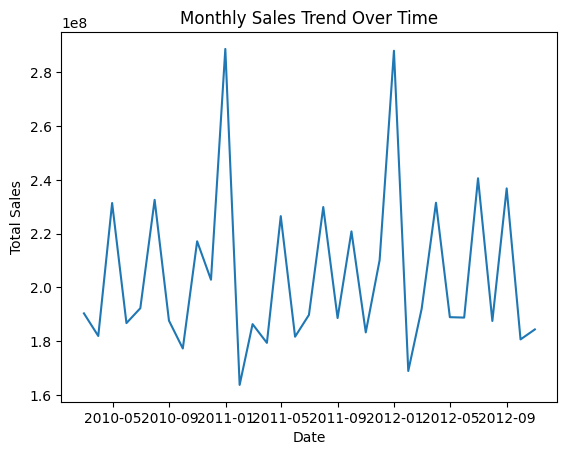

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Walmart.csv")

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Aggregate sales by month
monthly_sales = (
    df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales']
      .sum()
      .reset_index()
)

# Plot sales trend
plt.figure()
plt.plot(monthly_sales['Date'], monthly_sales['Weekly_Sales'])
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend Over Time")
plt.show()

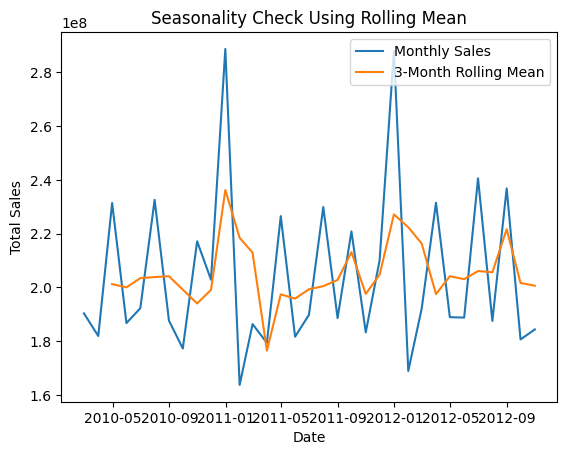

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Walmart.csv")

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Aggregate sales by month
monthly_sales = (
    df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales']
      .sum()
)

# Calculate rolling mean (3-month window)
rolling_mean = monthly_sales.rolling(window=3).mean()

# Plot original sales and rolling mean
plt.figure()
plt.plot(monthly_sales, label='Monthly Sales')
plt.plot(rolling_mean, label='3-Month Rolling Mean')
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Seasonality Check Using Rolling Mean")
plt.legend()
plt.show()


In [13]:
rolling_mean.dropna().head()

,Weekly_Sales
Date,
2010-04-30,2.012217e+08
2010-05-31,2.000144e+08
2010-06-30,2.034565e+08
2010-07-31,2.038457e+08
2010-08-31,2.041555e+08


In [16]:
import pandas as pd

# Load dataset
df = pd.read_csv("Walmart.csv")

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Aggregate sales by month
monthly_sales = (
    df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales']
      .sum()
      .reset_index()
)

# Sort by date
monthly_sales = monthly_sales.sort_values('Date')

# Time-based split (80% train, 20% test)
split_index = int(len(monthly_sales) * 0.8)

train = monthly_sales.iloc[:split_index]
test  = monthly_sales.iloc[split_index:]
train.head(), test.head(), train.shape

(        Date  Weekly_Sales
 0 2010-02-28  1.903330e+08
 1 2010-03-31  1.819198e+08
 2 2010-04-30  2.314124e+08
 3 2010-05-31  1.867109e+08
 4 2010-06-30  1.922462e+08,
          Date  Weekly_Sales
 26 2012-04-30  1.889209e+08
 27 2012-05-31  1.887665e+08
 28 2012-06-30  2.406103e+08
 29 2012-07-31  1.875095e+08
 30 2012-08-31  2.368508e+08,
 (26, 2))

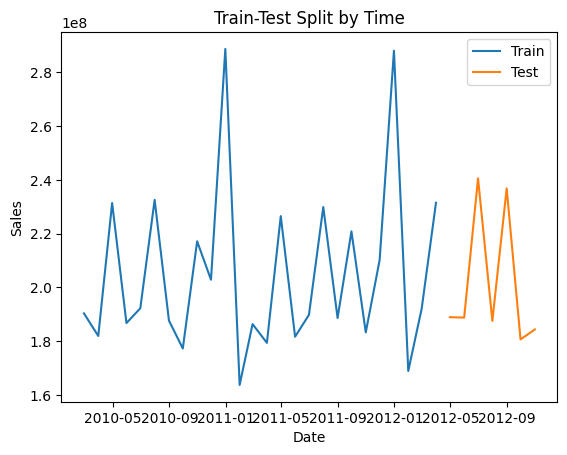

In [18]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train['Date'], train['Weekly_Sales'], label='Train')
plt.plot(test['Date'], test['Weekly_Sales'], label='Test')
plt.title("Train-Test Split by Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

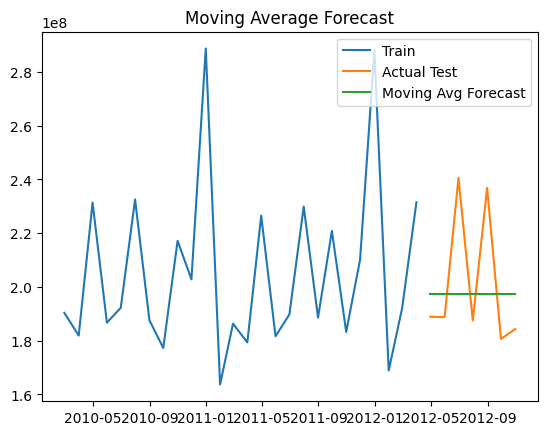

Moving Average Forecast


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Walmart.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Monthly aggregation
monthly_sales = (
    df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales']
      .sum()
      .sort_index()
)

# Train-test split
split_index = int(len(monthly_sales) * 0.8)
train = monthly_sales.iloc[:split_index]
test = monthly_sales.iloc[split_index:]

# Moving Average Forecast (window = 3)
ma_window = 3
ma_forecast = train.rolling(window=ma_window).mean().iloc[-1]

# Repeat forecast for test length
ma_predictions = [ma_forecast] * len(test)

# Plot
plt.figure()
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual Test")
plt.plot(test.index, ma_predictions, label="Moving Avg Forecast")
plt.legend()
plt.title("Moving Average Forecast")
plt.show()


In [24]:
print("Moving Average Forecast Value:", ma_forecast)

Moving Average Forecast Value: 197489233.89666668


/tmp/ipython-input-2835883650.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales']


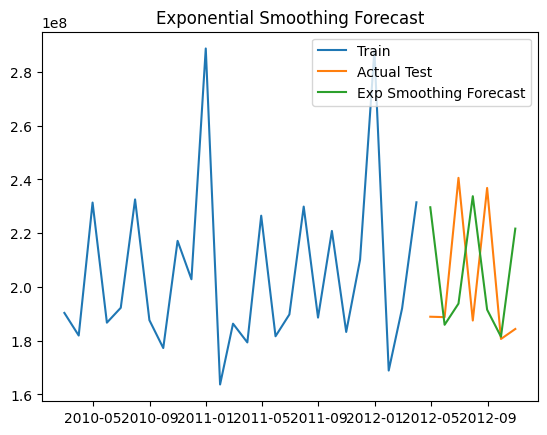

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load data
file_path = "/content/Walmart.csv"
if not os.path.exists(file_path):
    # Raise an explicit error message to guide the user
    raise FileNotFoundError(
        f"Error: File not found at {file_path}. Please upload 'Walmart.csv' to the /content/ directory to proceed."
    )
else:
    df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Monthly aggregation
monthly_sales = (
    df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales']
      .sum()
      .sort_index()
)

# Train-test split
split_index = int(len(monthly_sales) * 0.8)
train = monthly_sales.iloc[:split_index]
test = monthly_sales.iloc[split_index:]

# Fit model on training data
model = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='add',
    seasonal_periods=12   # monthly seasonality
)

hw_model = model.fit()

# Forecast
hw_forecast = hw_model.forecast(len(test))

# Plot results
plt.figure()
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual Test")
plt.plot(test.index, hw_forecast, label="Exp Smoothing Forecast")
plt.legend()
plt.title("Exponential Smoothing Forecast")
plt.show()

In [11]:
hw_forecast = hw_model.forecast(len(test))
hw_forecast

print("Exponential Smoothing Forecast (sample):")
print(hw_forecast.head())

Exponential Smoothing Forecast (sample):
2012-04-30    2.296636e+08
2012-05-31    1.859218e+08
2012-06-30    1.937996e+08
2012-07-31    2.337784e+08
2012-08-31    1.915529e+08
Freq: ME, dtype: float64


In [15]:
# Recalculate ma_forecast as it was not found in the current kernel state
ma_window = 3
ma_forecast = train.rolling(window=ma_window).mean().iloc[-1]

ma_output = pd.DataFrame({
    "Forecast_Type": ["Moving Average (3-month)"],
    "Forecast_Value": [ma_forecast]
})

ma_output

,Forecast_Type,Forecast_Value
0,Moving Average (3-month),1.974892e+08


In [16]:
# Moving Average Forecast
ma_window = 3
ma_forecast = train.rolling(window=ma_window).mean().iloc[-1]

print(f"Moving Average Forecast Value: {ma_forecast:.2e}")

Moving Average Forecast Value: 1.97e+08


In [12]:
forecast_df = pd.DataFrame({
    "Date": test.index,
    "Actual_Sales": test.values,
    "Forecast_Sales": hw_forecast.values
})

forecast_df.head()

,Date,Actual_Sales,Forecast_Sales
0,2012-04-30,1.889209e+08,2.296636e+08
1,2012-05-31,1.887665e+08,1.859218e+08
2,2012-06-30,2.406103e+08,1.937996e+08
3,2012-07-31,1.875095e+08,2.337784e+08
4,2012-08-31,2.368508e+08,1.915529e+08


In [21]:
#download the forecast data set.
forecast_df.to_csv("forecast_results.csv", index=False)
from google.colab import files
files.download("forecast_results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
#Fit Model on Full Data
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load dataset
df = pd.read_csv("Walmart.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Monthly aggregation
monthly_sales = (
    df.groupby(pd.Grouper(key='Date', freq='ME'))['Weekly_Sales']
      .sum()
)

# Fit Holt-Winters model on full data
model = ExponentialSmoothing(
    monthly_sales,
    trend='add',
    seasonal='add',
    seasonal_periods=12
)

hw_model = model.fit()

In [19]:
# Forecast next 6 months
n_periods = 6
future_forecast = hw_model.forecast(n_periods)

future_forecast

,0
2012-11-30,2.069008e+08
2012-12-31,2.897892e+08
2013-01-31,1.671331e+08
2013-02-28,1.902962e+08
2013-03-31,2.009733e+08
2013-04-30,2.130736e+08


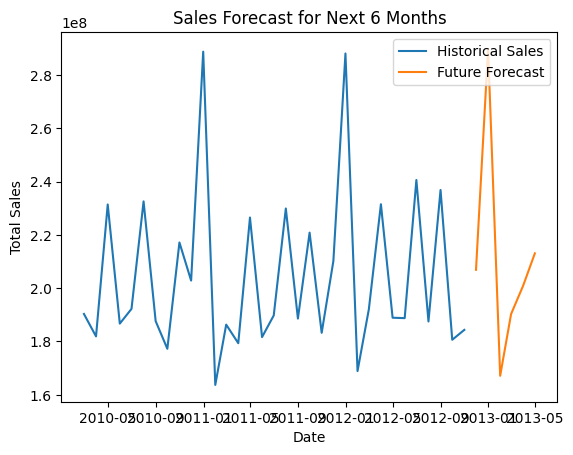

In [20]:
#Plot Historical Sales + Forecast
plt.figure()
plt.plot(monthly_sales.index, monthly_sales, label="Historical Sales")
plt.plot(future_forecast.index, future_forecast, label="Future Forecast")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Sales Forecast for Next 6 Months")
plt.legend()
plt.show()

In [22]:
forecast_output = pd.DataFrame({
    "Date": future_forecast.index,
    "Forecasted_Sales": future_forecast.values
})

forecast_output.to_csv("future_sales_forecast.csv", index=False)

from google.colab import files
files.download("future_sales_forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
#MAE & MAPE
import numpy as np
from sklearn.metrics import mean_absolute_error

# Actual and forecast values
y_true = test.values
y_pred = hw_forecast.values

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"MAE  : {mae:.2e}")
print(f"MAPE : {mape:.2f}%")

MAE  : 3.15e+07
MAPE : 15.29%


In [24]:
#Compare with Moving Average
# Moving Average baseline error
ma_pred = np.array([ma_forecast] * len(test))

mae_ma = mean_absolute_error(y_true, ma_pred)
mape_ma = np.mean(np.abs((y_true - ma_pred) / y_true)) * 100

print(f"MA Model - MAE: {mae_ma:.2e}, MAPE: {mape_ma:.2f}%")

MA Model - MAE: 2.00e+07, MAPE: 9.35%
